In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder,StandardScaler
plt.style.use("fivethirtyeight")
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
train_df = pd.read_csv(r"C:\Users\saran\Documents\INEURON\EDA\black_friday\black_friday\blackFriday_train.csv")
test_df = pd.read_csv(r"C:\Users\saran\Documents\INEURON\EDA\black_friday\black_friday\blackFriday_test.csv")

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# now concatinating the train & test data
df = pd.concat([train_df,test_df],axis=0)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
dtypes = df.dtypes
print(dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object


In [9]:
# Now cleaning the dataset
missing_values = df.isnull().sum()
print(missing_values)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64


In [10]:
# checking the unique values
cat2_unique = df["Product_Category_2"].unique()
cat3_unique = df["Product_Category_3"].unique()
print(cat2_unique)
print(cat3_unique)

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


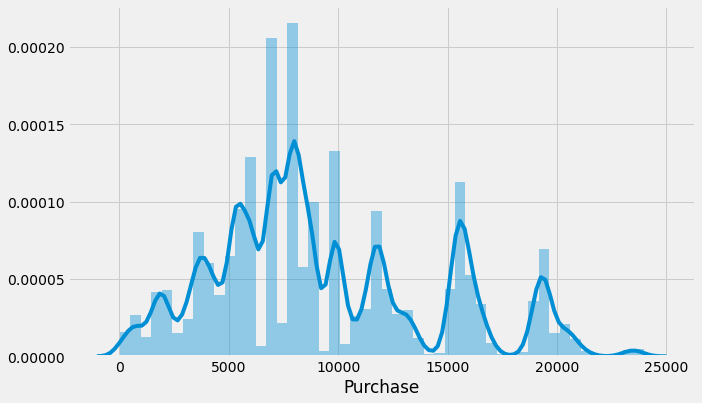

In [11]:
# checking the distribution of Purchase vector
fig,axis = plt.subplots(figsize=(10,6))
sns.distplot(df["Purchase"],ax=axis)
# it's a right skewed

In [12]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])
df["Purchase"] = df["Purchase"].fillna(df["Purchase"].median())

In [13]:
# now checking the null values again
missing_values = df.isnull().sum()
# print(missing_values)

In [14]:
# checking the unique  values

for i in df.columns:
    unique = df[i].unique()
    print(i)
    print(unique,"\n")

User_ID
[1000001 1000002 1000003 ... 1004113 1005391 1001529] 

Product_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00030342' 'P00074942'
 'P00253842'] 

Gender
['F' 'M'] 

Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] 

Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6] 

City_Category
['A' 'C' 'B'] 

Stay_In_Current_City_Years
['2' '4+' '3' '1' '0'] 

Marital_Status
[0 1] 

Product_Category_1
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19] 

Product_Category_2
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3
[16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 

Purchase
[ 8370. 15200.  1422. ...   135.   123.   613.] 



data preprocessing

In [15]:
df["Gender"] = df["Gender"].map({"F":0,"M":1})

In [16]:
label = LabelEncoder()
df["Age"] = label.fit_transform(df["Age"])

In [17]:
city = pd.get_dummies(df["City_Category"],drop_first=True)
print(city)

df = pd.concat([city,df],axis=1)
df

        B  C
0       0  0
1       0  0
2       0  0
3       0  0
4       0  1
...    .. ..
233594  1  0
233595  1  0
233596  1  0
233597  0  1
233598  1  0

[783667 rows x 2 columns]


,B,C,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,0,0,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,0,0,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,0,1,1000002,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,1006036,P00118942,0,2,15,B,4+,1,8,8.0,16.0,8047.0
233595,1,0,1006036,P00254642,0,2,15,B,4+,1,5,8.0,16.0,8047.0
233596,1,0,1006036,P00031842,0,2,15,B,4+,1,1,5.0,12.0,8047.0
233597,0,1,1006037,P00124742,0,4,1,C,4+,0,10,16.0,16.0,8047.0


In [18]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","").astype(int)

In [19]:
# change the dtype
df["B"]  = df["B"].astype("int64")
df["C"] = df["C"].astype("int64")
df["Product_Category_2"] = df["Product_Category_2"].astype("int64")
df["Product_Category_3"] = df["Product_Category_3"].astype("int64")
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype("int64")

In [20]:
# rename some columns
df.rename(columns={"Product_Category_1":"pcat1","Product_Category_2":"pcat2","Product_Category_3":"pcat3"},inplace=True)

EDA

Text(0.5, 1.0, 'purchase by gender')

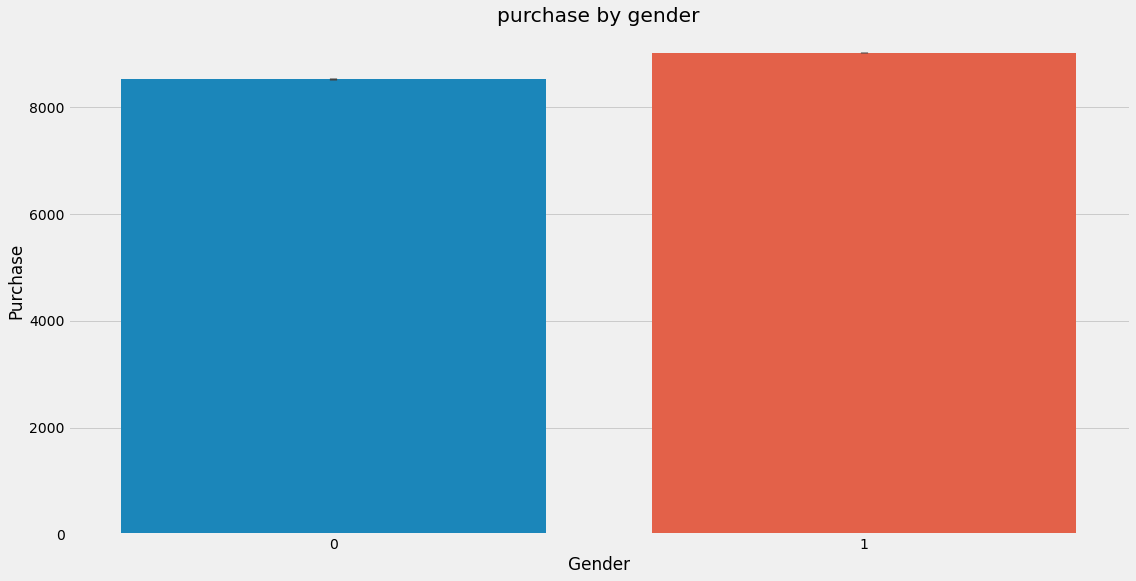

In [21]:
_=sns.catplot("Gender","Purchase",data=df,kind='bar',height=8,aspect=2)
plt.title("purchase by gender")

Text(0.5, 1.0, 'purchase by Age')

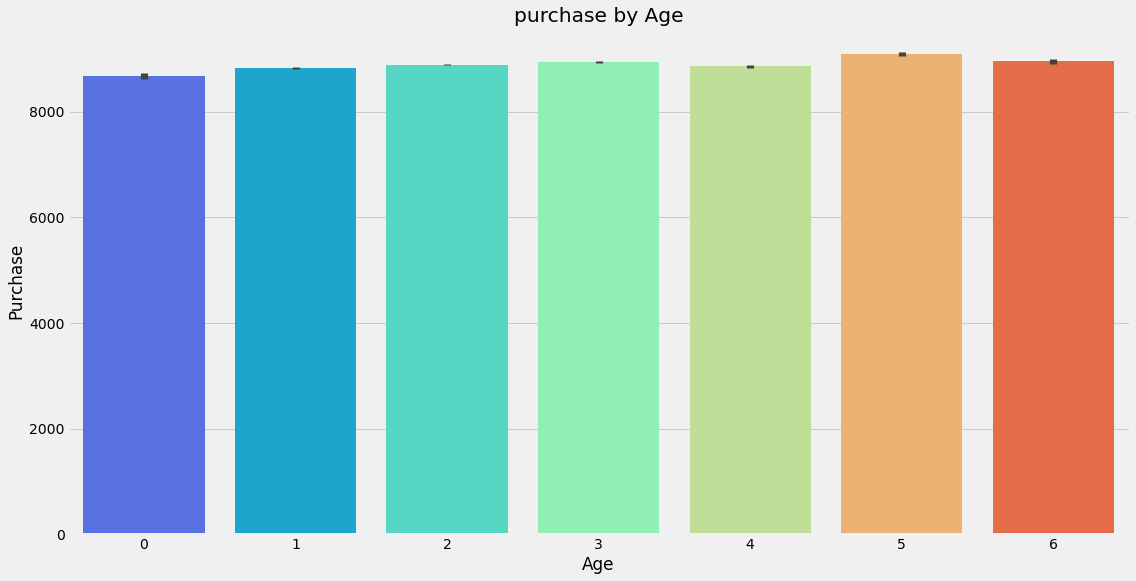

In [22]:
_=sns.catplot("Age","Purchase",data=df,kind='bar',height=8,aspect=2,palette = "rainbow")
plt.title("purchase by Age")

Text(0.5, 1.0, 'purchase by Occupation')

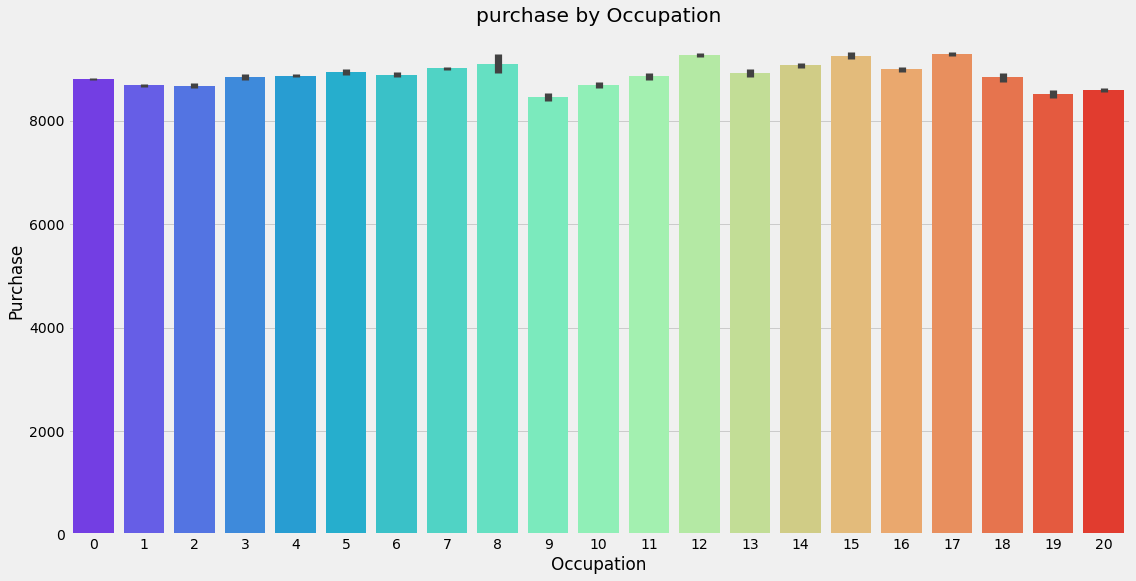

In [23]:
_=sns.catplot("Occupation","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title("purchase by Occupation")

Text(0.5, 1.0, ' Avg purchase by City_Category')

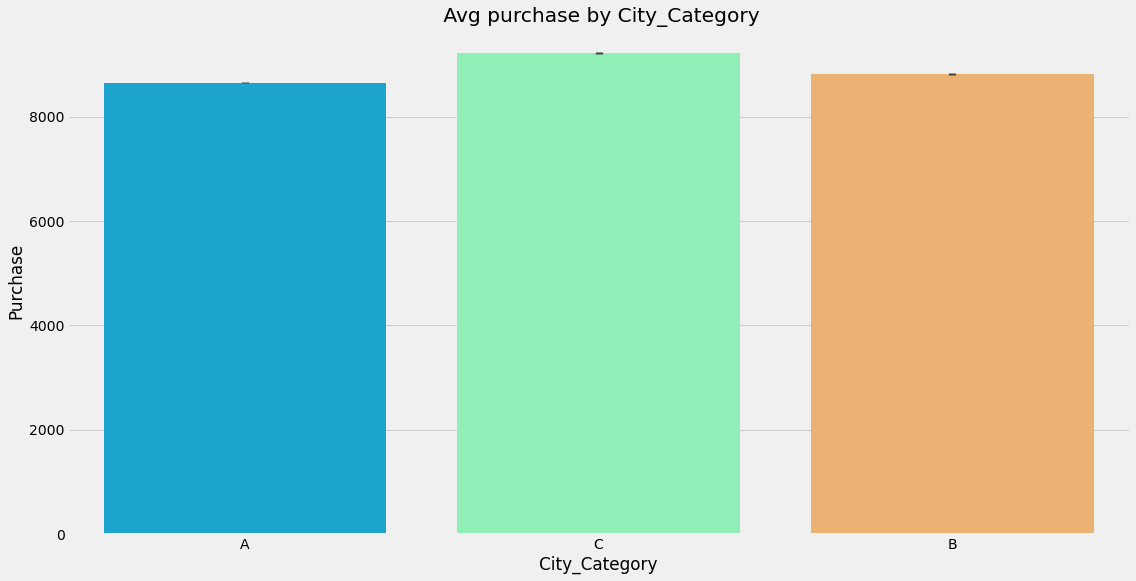

In [24]:
_=sns.catplot("City_Category","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title(" Avg purchase by City_Category")

Text(0.5, 1.0, ' Avg purchase by Stay_In_Current_City_Years')

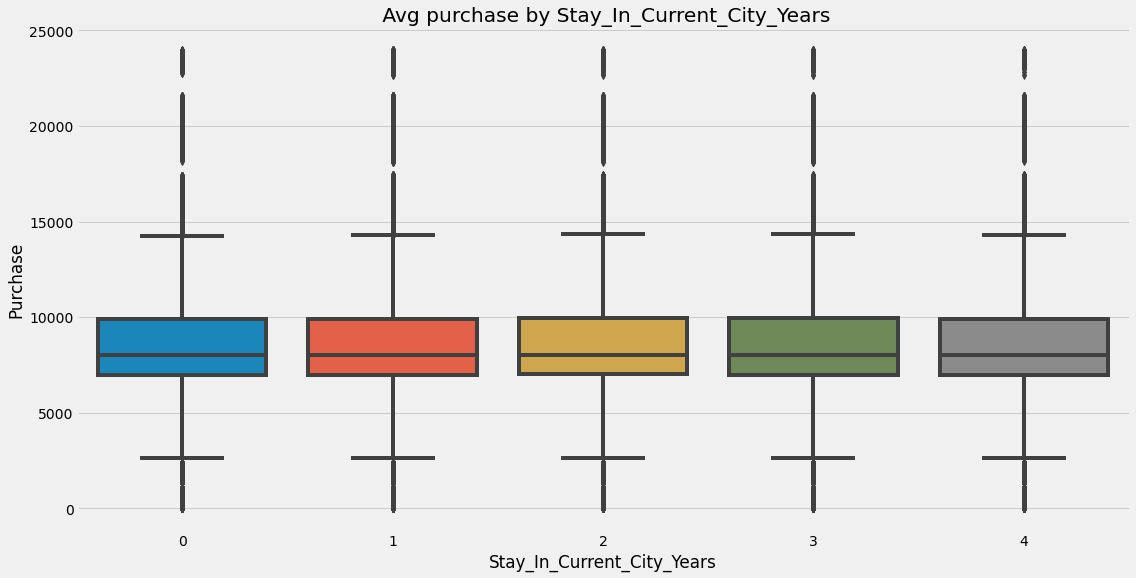

In [25]:
_=sns.catplot("Stay_In_Current_City_Years","Purchase",data=df,kind='box',height=8,aspect=2)
plt.title(" Avg purchase by Stay_In_Current_City_Years")

Text(0.5, 1.0, ' Avg purchase by Marital_Status')

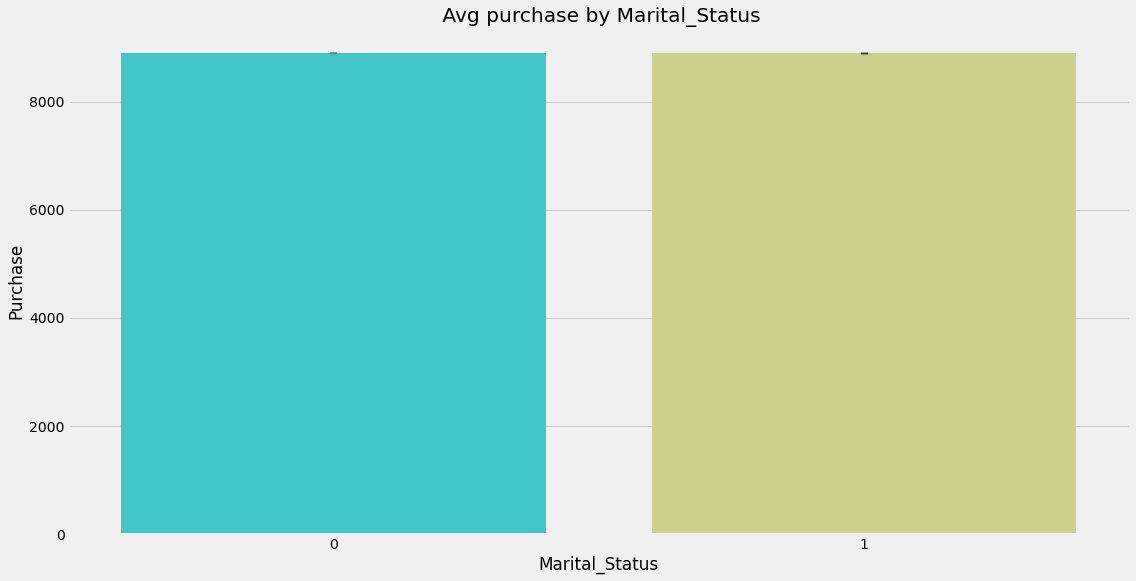

In [26]:
_=sns.catplot("Marital_Status","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title(" Avg purchase by Marital_Status")

Text(0.5, 1.0, ' Avg purchase by pcat1')

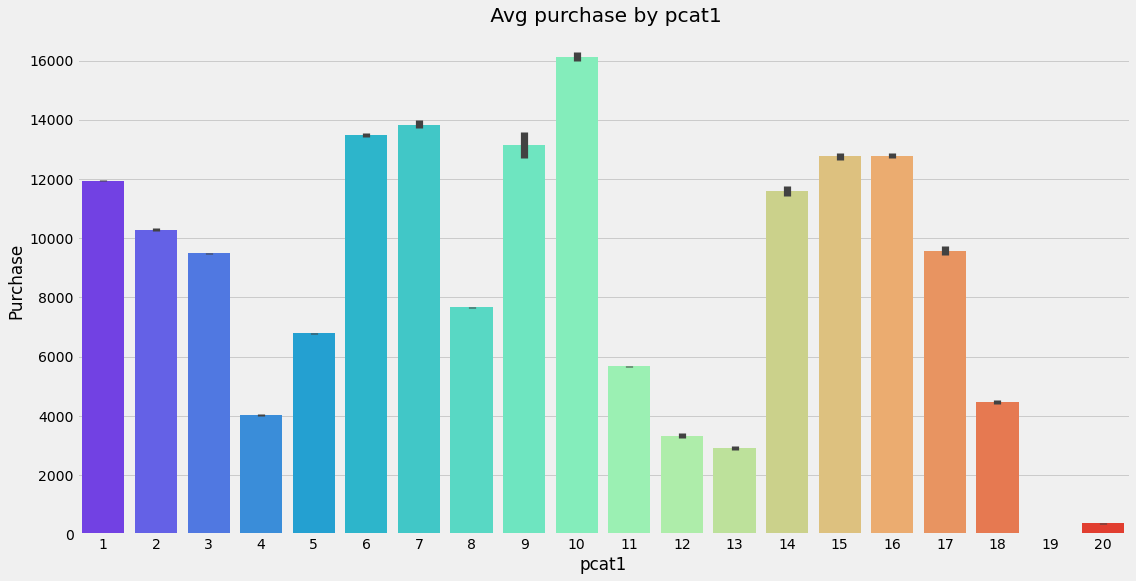

In [27]:
_=sns.catplot("pcat1","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title(" Avg purchase by pcat1")

Text(0.5, 1.0, ' Avg purchase by pcat2')

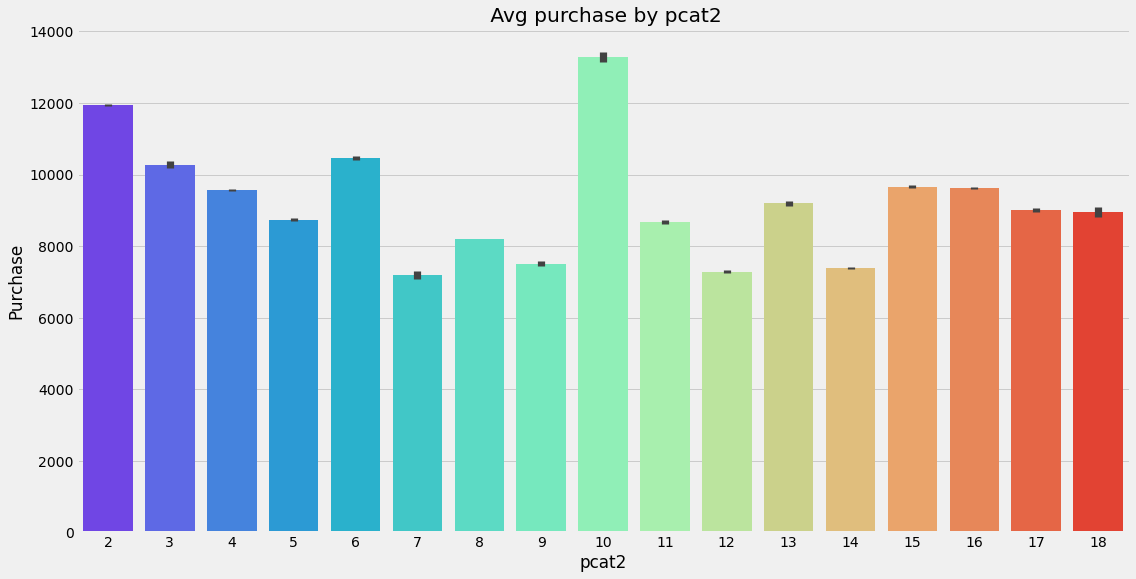

In [28]:
_=sns.catplot("pcat2","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title(" Avg purchase by pcat2")

Text(0.5, 1.0, ' Avg purchase by pcat3')

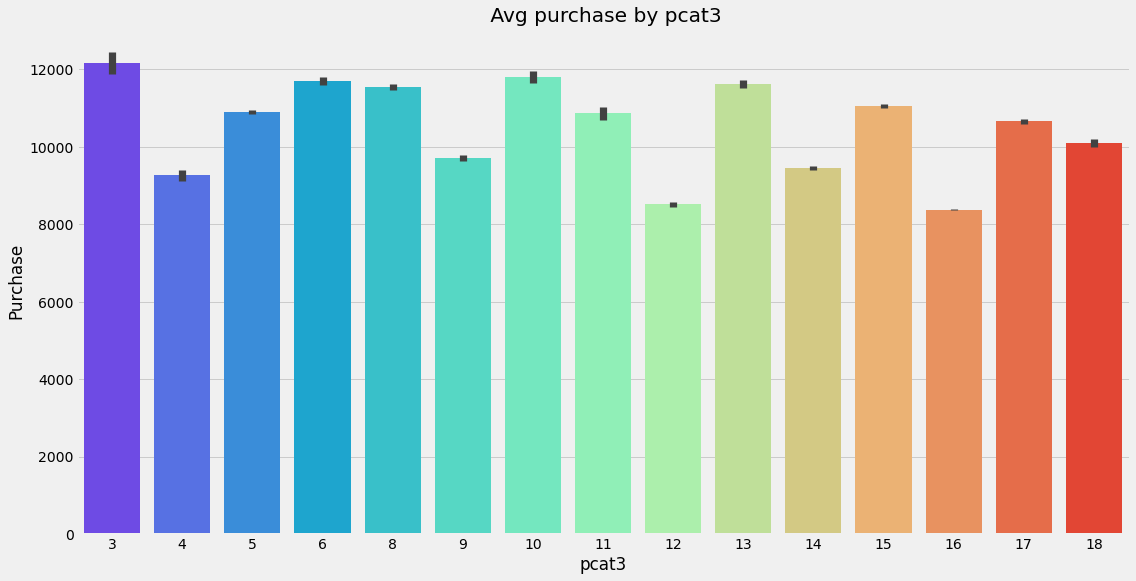

In [29]:
_=sns.catplot("pcat3","Purchase",data=df,kind='bar',height=8,aspect=2,palette="rainbow")
plt.title(" Avg purchase by pcat3")

In [30]:
# drop unnecessory columns
df.drop(["User_ID","Product_ID","City_Category"],axis=1,inplace=True)

In [31]:
# splitting the feature & label columns
x = df.drop(["Purchase"],axis=1)
y = df["Purchase"]

In [32]:
# Feature scalling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

In [33]:
# train test split the dataset
xtrain,xtest,ytrain,ytest  = train_test_split(x_scaled,y,random_state=22)

In [34]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


In [1]:
class train_test:
    def __init__(self,x_train,y_train,x_test,y_test):
        self.xtrain = x_train
        self.ytrain = y_train
        self.xtest = x_test
        self.ytest = y_test
        
    def train_test_score(self,model):
        self.model = model
        lr = self.model
        lr.fit(self.xtrain,self.ytrain)
        train_score = lr.score(self.xtrain,self.ytrain)
        test_score = lr.score(self.xtest,self.ytest)
        return (train_score,test_score)
    
class cross_validation:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def cross_score(self,model):
        self.model = model
        score = cross_val_score(self.model,self.x,self.y,n_jobs=-1,verbose=3)
        return np.mean(score)
    
class ClientApi:
    def __init__(self):
        self.train_test_Obj = train_test(xtrain,ytrain,xtest,ytest)
        self.cross_val_obj = cross_validation(x_scaled,y)

client = ClientApi()

NameError: name 'xtrain' is not defined

In [39]:
client.cross_val_obj.cross_score(LinearRegression())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


0.07772317708418582

In [40]:
client.cross_val_obj.cross_score(Ridge())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


0.07772214909572724

In [41]:
client.cross_val_obj.cross_score(Lasso())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


0.07758079384478407

In [42]:
client.cross_val_obj.cross_score(ElasticNet())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


0.004080480182327895

In [36]:
client.cross_val_obj.cross_score(RandomForestRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 11.6min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 11.9min finished


0.3462224291901318

In [37]:
client.cross_val_obj.cross_score(XGBRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


0.39198092489661474

In [38]:
client.cross_val_obj.cross_score(AdaBoostRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


0.2697822581335902

In [39]:
client.cross_val_obj.cross_score(GradientBoostingRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


0.3753102975276078

In [40]:
client.cross_val_obj.cross_score(DummyRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


-0.01111238575731277

In [41]:
client.cross_val_obj.cross_score(DecisionTreeRegressor())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.1s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.5s finished


0.2834471414068468

In [2]:
train_df = pd.read_csv(r"C:\Users\saran\Documents\INEURON\EDA\black_friday\black_friday\blackFriday_train.csv")

In [ ]:
count = 0
for col in train_df.columns:
    len(train_df[col])

In [9]:
from sklearn.metrics import SCORERS,scorer

In [8]:
if (len(train_df["Age"])-train_df["Age"].count()) ==len(train_df["Age"]):
    print("pass")
else:
    print("fail")

fail


In [66]:
train_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
